## Extended Figure 5

This manuscript generates extended data figure 5 and relavent data of the paper. 

Kexin Dong

Date created: May 24, 2024  

Last updated: Oct 20, 2025

In [1]:
import matplotlib as mpl
import scipy.stats
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
from sksurv.nonparametric import kaplan_meier_estimator
from statannotations.Annotator import Annotator
from matplotlib.ticker import FixedLocator, FuncFormatter
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## Extended Figure 5b

Detailed schematic of the generation of human-mouse immunogenic peptide pairs from validated human ones, and the relationship of MHC-I binding %Rank between them.  

In [2]:
def dict_score_class(h,m):
    if h <= 2 and m <=2:
        if h <= .5 and m<= .5:
            return 'strong'
        else:
            return 'both'
    elif m>2:
        if h<=2:
            return 'honly'
        else:
            return 'neither'
    else:
        return 'monly'
    
dict_color_class = {
    'strong':'darkred',
    'both':'tab:purple',
    'honly':'tab:orange',
    'monly':'tab:blue',
    'neither':'grey'
}

In [3]:
l_final = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/neoantigen/final_result/h2m_neoantigen_result_v3.csv')

In [4]:
l_final['class_kb'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_kbdb'])]
l_final['color_kb'] = [dict_color_class[x] for x in l_final['class_kb']]

In [5]:
l_final['class'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_m'])]
l_final['color'] = [dict_color_class[x] for x in l_final['class']]

In [6]:
correlation, p_value = scipy.stats.spearmanr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Spearman correlation coefficient:", correlation)
print("P-value of the correlation:", p_value)
corr_p, p_value_p = scipy.stats.pearsonr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Pearson correlation coefficient:", corr_p)
print("P-value of the correlation:", p_value_p)

Spearman correlation coefficient: 0.2492619634118626
P-value of the correlation: 7.796142187894078e-07
Pearson correlation coefficient: 0.16689712908848375
P-value of the correlation: 0.0010432730073207648


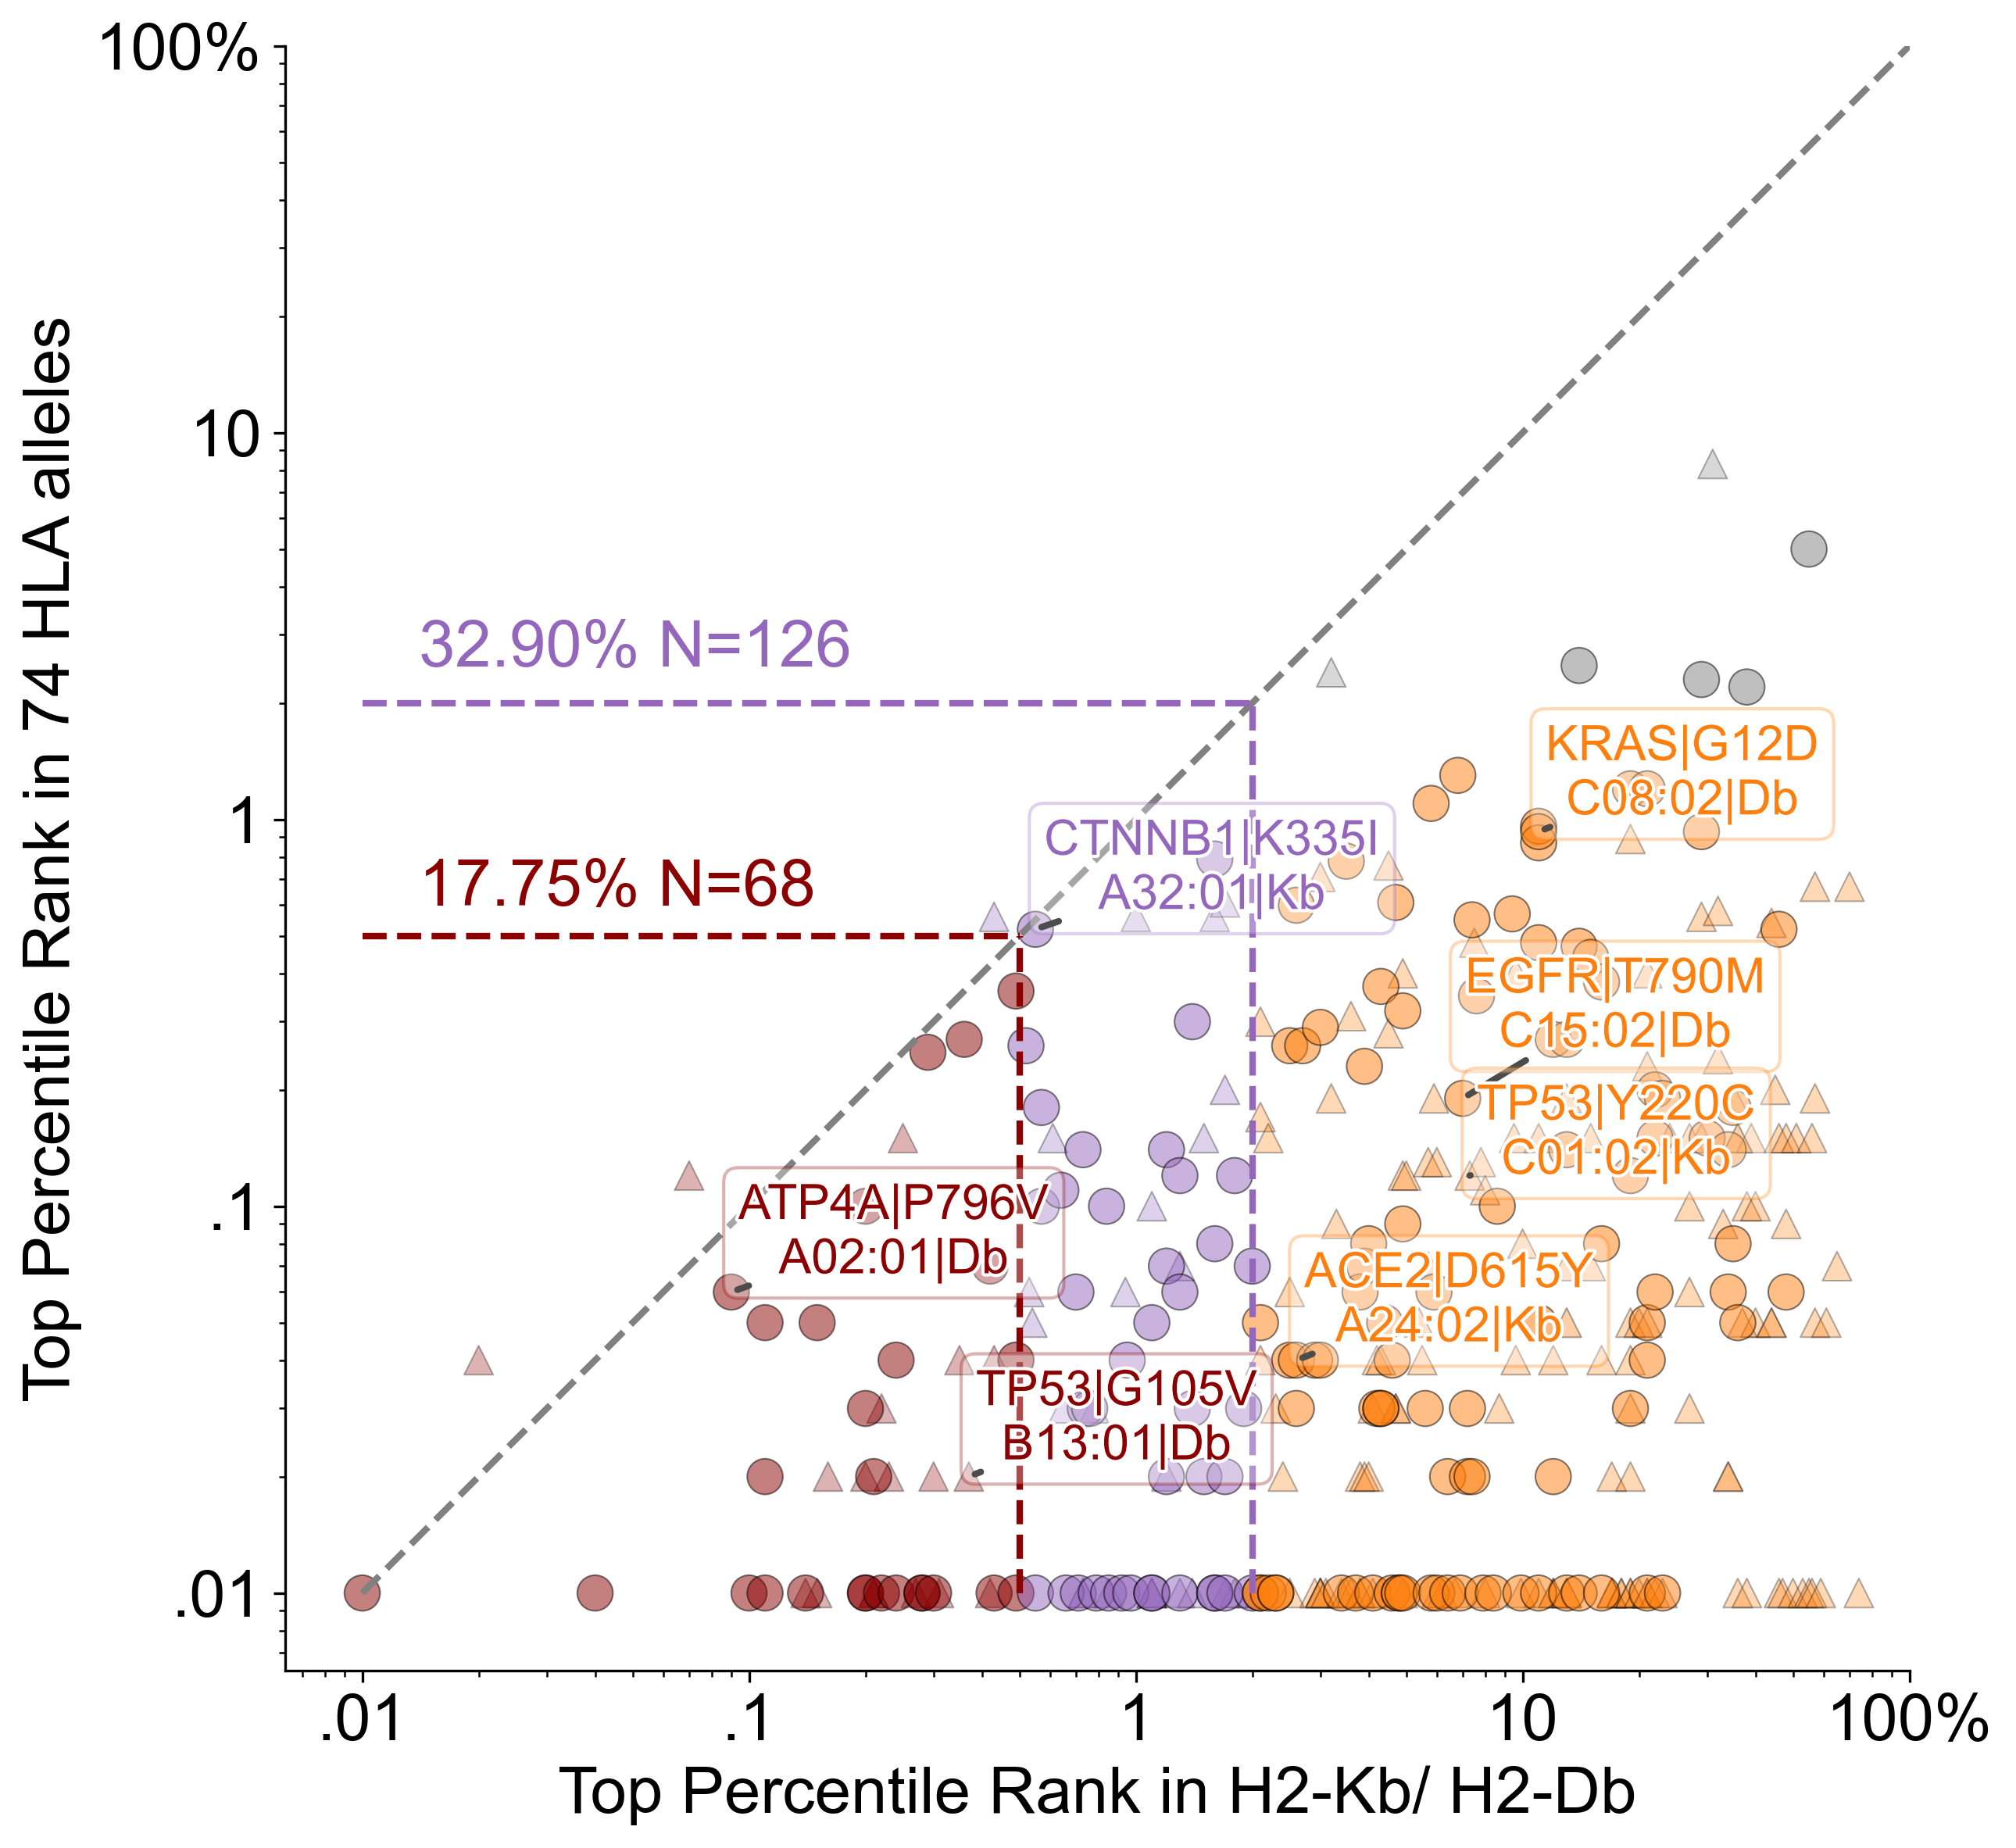

In [7]:
l_plot = l_final
bbb2 = l_plot[[abs(x-y)<=0.05 for x,y in zip(l_plot['percentile_rank_kbdb'],l_plot['percentile_rank_h'])]].iloc[:2,:]
# bbb2 = l_plot[(l_plot['percentile_rank_h'] <= .01) & (l_plot['percentile_rank_m'] >= 85)].iloc[:3,:]
# top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
bbb1 = l_plot[l_plot['gene_name_h'].isin(['TP53','KRAS','ACE2','EGFR']) & l_plot['HGVSp_h'].isin(['D615Y','G105V','T790M','G12D','Y220C'])]
bb2 = pd.concat([bbb1,bbb2]).drop_duplicates(subset = 'HGVSp_h')

x = list(bb2['percentile_rank_kbdb'])
y = list(bb2['percentile_rank_h'])
t = [f'{x}|{y}\n{p}|{q}' for x,y,p,q in zip(bb2['gene_name_h'], bb2['HGVSp_h'], bb2['HLA_allele'], bb2['KbDb_allele'])]
c = list(bb2['color_kb'])


fig, ax = plt.subplots(figsize=(9, 9), dpi=300)

plot_1 = l_plot[[x==y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]
plot_2 = l_plot[[x!=y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]

ax.scatter(data=plot_2.sort_values('percentile_rank_kbdb').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_kbdb', y='percentile_rank_h', c = 'color_kb',alpha=.3, s=80, edgecolor='black', linewidths=.5, marker='^')
ax.scatter(data=plot_1.sort_values('percentile_rank_kbdb').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_kbdb', y='percentile_rank_h', c = 'color_kb',alpha=.5, s=120, edgecolor='black', linewidths=.5)

plt.xscale('log')
plt.yscale('log')
ax.plot([.01, 100], [.01, 100], linewidth=2, linestyle='--', color='grey')
ax.plot([.01, .5], [.5, .5], linewidth=2, linestyle='--', color='darkred')
ax.plot( [.5, .5], [.01, .5],linewidth=2, linestyle='--', color='darkred')
ax.plot([.01, 2], [2, 2], linewidth=2, linestyle='--', color='tab:purple')
ax.plot([2, 2], [.01, 2],linewidth=2, linestyle='--', color='tab:purple')

ax.set_aspect('equal')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_ylabel(f"Top Percentile Rank in 74 HLA alleles", fontsize=20)
ax.set_xlabel("Top Percentile Rank in H2-Kb/ H2-Db", fontsize=20)

ticks = [0.01, 0.1, 1, 10, 100]
labels = ['.01', '.1', '1', '10', '100%']

ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_locator(FixedLocator(ticks))

ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))

ax.tick_params(axis='both', labelsize=20)

# percentage label
l_1 = len(l_plot)
l_2 = len(l_plot[(l_plot['class_kb']=='both') | (l_plot['class_kb']=='strong')])
l_3 = len(l_plot[(l_plot['class_kb']=='both')])
per_1=l_2/l_1*100
per_2=l_3/l_1*100

tt = [f'{per_1:.2f}% N={l_2}', f'{per_2:.2f}% N={l_3}']
xx = [.014,.014]
yy = [2.5,.6]
cc = ['tab:purple', 'darkred']

# ax.set_title(f"{per_1:.2f}% predicted to be presented by both human and mouse, MHC class I", fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

texts = [ax.text(x[i], y[i], t[i], fontsize=15, color=c[i],
                 path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")],
                bbox=dict(facecolor='white', edgecolor=c[i], boxstyle='round,pad=0.3',alpha=.3))
         for i in range(len(x))]

adjust_text(texts,only_move={'texts':'xy'}, ax=ax, 
            arrowprops=dict(arrowstyle="-", linewidth=2, alpha=1, color='black'))


texts_per = [ax.text(xx[i], yy[i], tt[i], fontsize=20, color=cc[i])
         for i in range(len(xx))]

plt.savefig('figures/ext_5b_main.pdf',bbox_inches='tight')
plt.show()

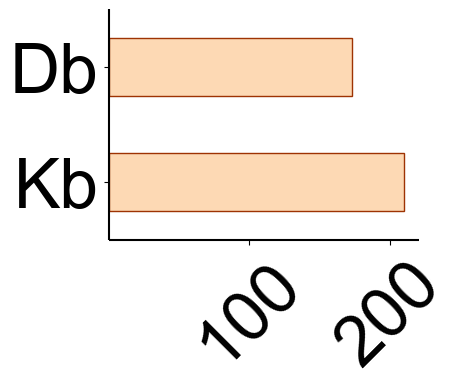

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
allele_counts = l_final['KbDb_allele'].value_counts()
allele_counts = allele_counts
allele_counts.plot(kind='barh', color = plt.cm.Oranges(0.2) , edgecolor = plt.cm.Oranges(0.9))
plt.title('H2 Allele Frequency')
plt.xlabel('Allele')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
ax.set_axisbelow(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_lw(1.5)
ax.spines["bottom"].set_capstyle("butt")
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_ticks([100,200])
ax.xaxis.set_ticklabels([100,200], size=50, fontweight=100)
plt.yticks(fontsize = 50)
plt.title('')
# plt.savefig('figures/ext_5b_xcount.pdf',bbox_inches='tight')
plt.show()

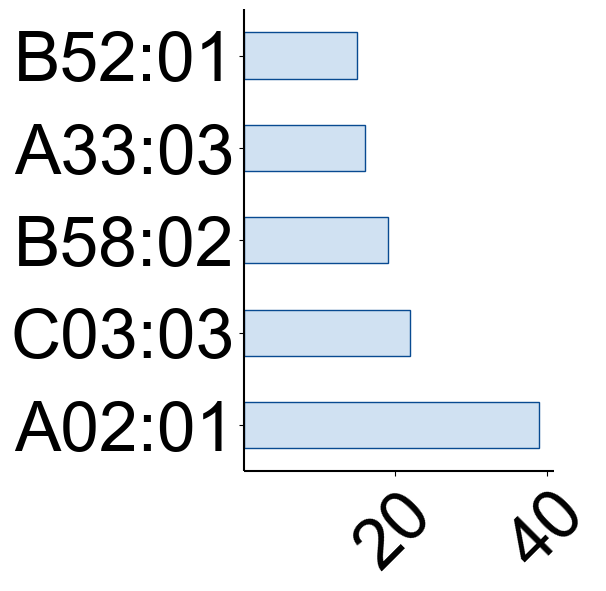

In [9]:
fig, ax = plt.subplots(figsize=(4,6))
allele_counts = l_final['HLA_allele'].value_counts()[:5]
allele_counts = allele_counts
allele_counts.plot(kind='barh', color = plt.cm.Blues(0.2) , edgecolor = plt.cm.Blues(0.9))
plt.title('H2 Allele Frequency')
plt.xlabel('Allele') 
plt.ylabel('Frequency') 
plt.xticks(rotation=45) 
ax.set_axisbelow(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_lw(1.5)
ax.spines["bottom"].set_capstyle("butt")
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_ticks([20,40])
ax.xaxis.set_ticklabels([20,40], size=50, fontweight=100)
plt.yticks(fontsize = 50)
plt.title('')
plt.savefig('figures/ext_5b_ycount.pdf',bbox_inches='tight')
plt.show()

# Extended Figure 5c

The relationship of MHC-I binding %Rank between human-mouse peptide pairs derived from mouse cancer-associated somatic mutations.

In [9]:
l_final = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/neoantigen/final_result/m2h_neoantigen_result_v3_.csv')

In [10]:
l_final['class'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_m'])]
l_final['color'] = [dict_color_class[x] for x in l_final['class']]

In [11]:
correlation, p_value = scipy.stats.spearmanr(list(l_final['percentile_rank_m']), list(l_final['percentile_rank_h']))
print("Spearman correlation coefficient:", correlation)
print("P-value of the correlation:", p_value)

Spearman correlation coefficient: 0.5695998488018532
P-value of the correlation: 0.0


In [12]:
corr_p, p_value_p = scipy.stats.pearsonr(list(l_final['percentile_rank_m']), list(l_final['percentile_rank_h']))
print("Pearson correlation coefficient:", corr_p)
print("P-value of the correlation:", p_value_p)

Pearson correlation coefficient: 0.6693448867922167
P-value of the correlation: 0.0


In [13]:
l_final = l_final.sort_values(by='percentile_rank_m').reset_index(drop=True)

In [14]:
l_final['class_kb'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_kbdb'])]
l_final['color_kb'] = [dict_color_class[x] for x in l_final['class_kb']]

In [15]:
correlation, p_value = scipy.stats.spearmanr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Spearman correlation coefficient:", correlation)
print("P-value of the correlation:", p_value)
corr_p, p_value_p = scipy.stats.pearsonr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Pearson correlation coefficient:", corr_p)
print("P-value of the correlation:", p_value_p)

Spearman correlation coefficient: 0.5353148525224072
P-value of the correlation: 7.791612175712907e-295
Pearson correlation coefficient: 0.4857466840581223
P-value of the correlation: 2.0011968937727545e-235


In [16]:
l_final = l_final.sort_values(by='percentile_rank_kbdb').reset_index(drop=True)

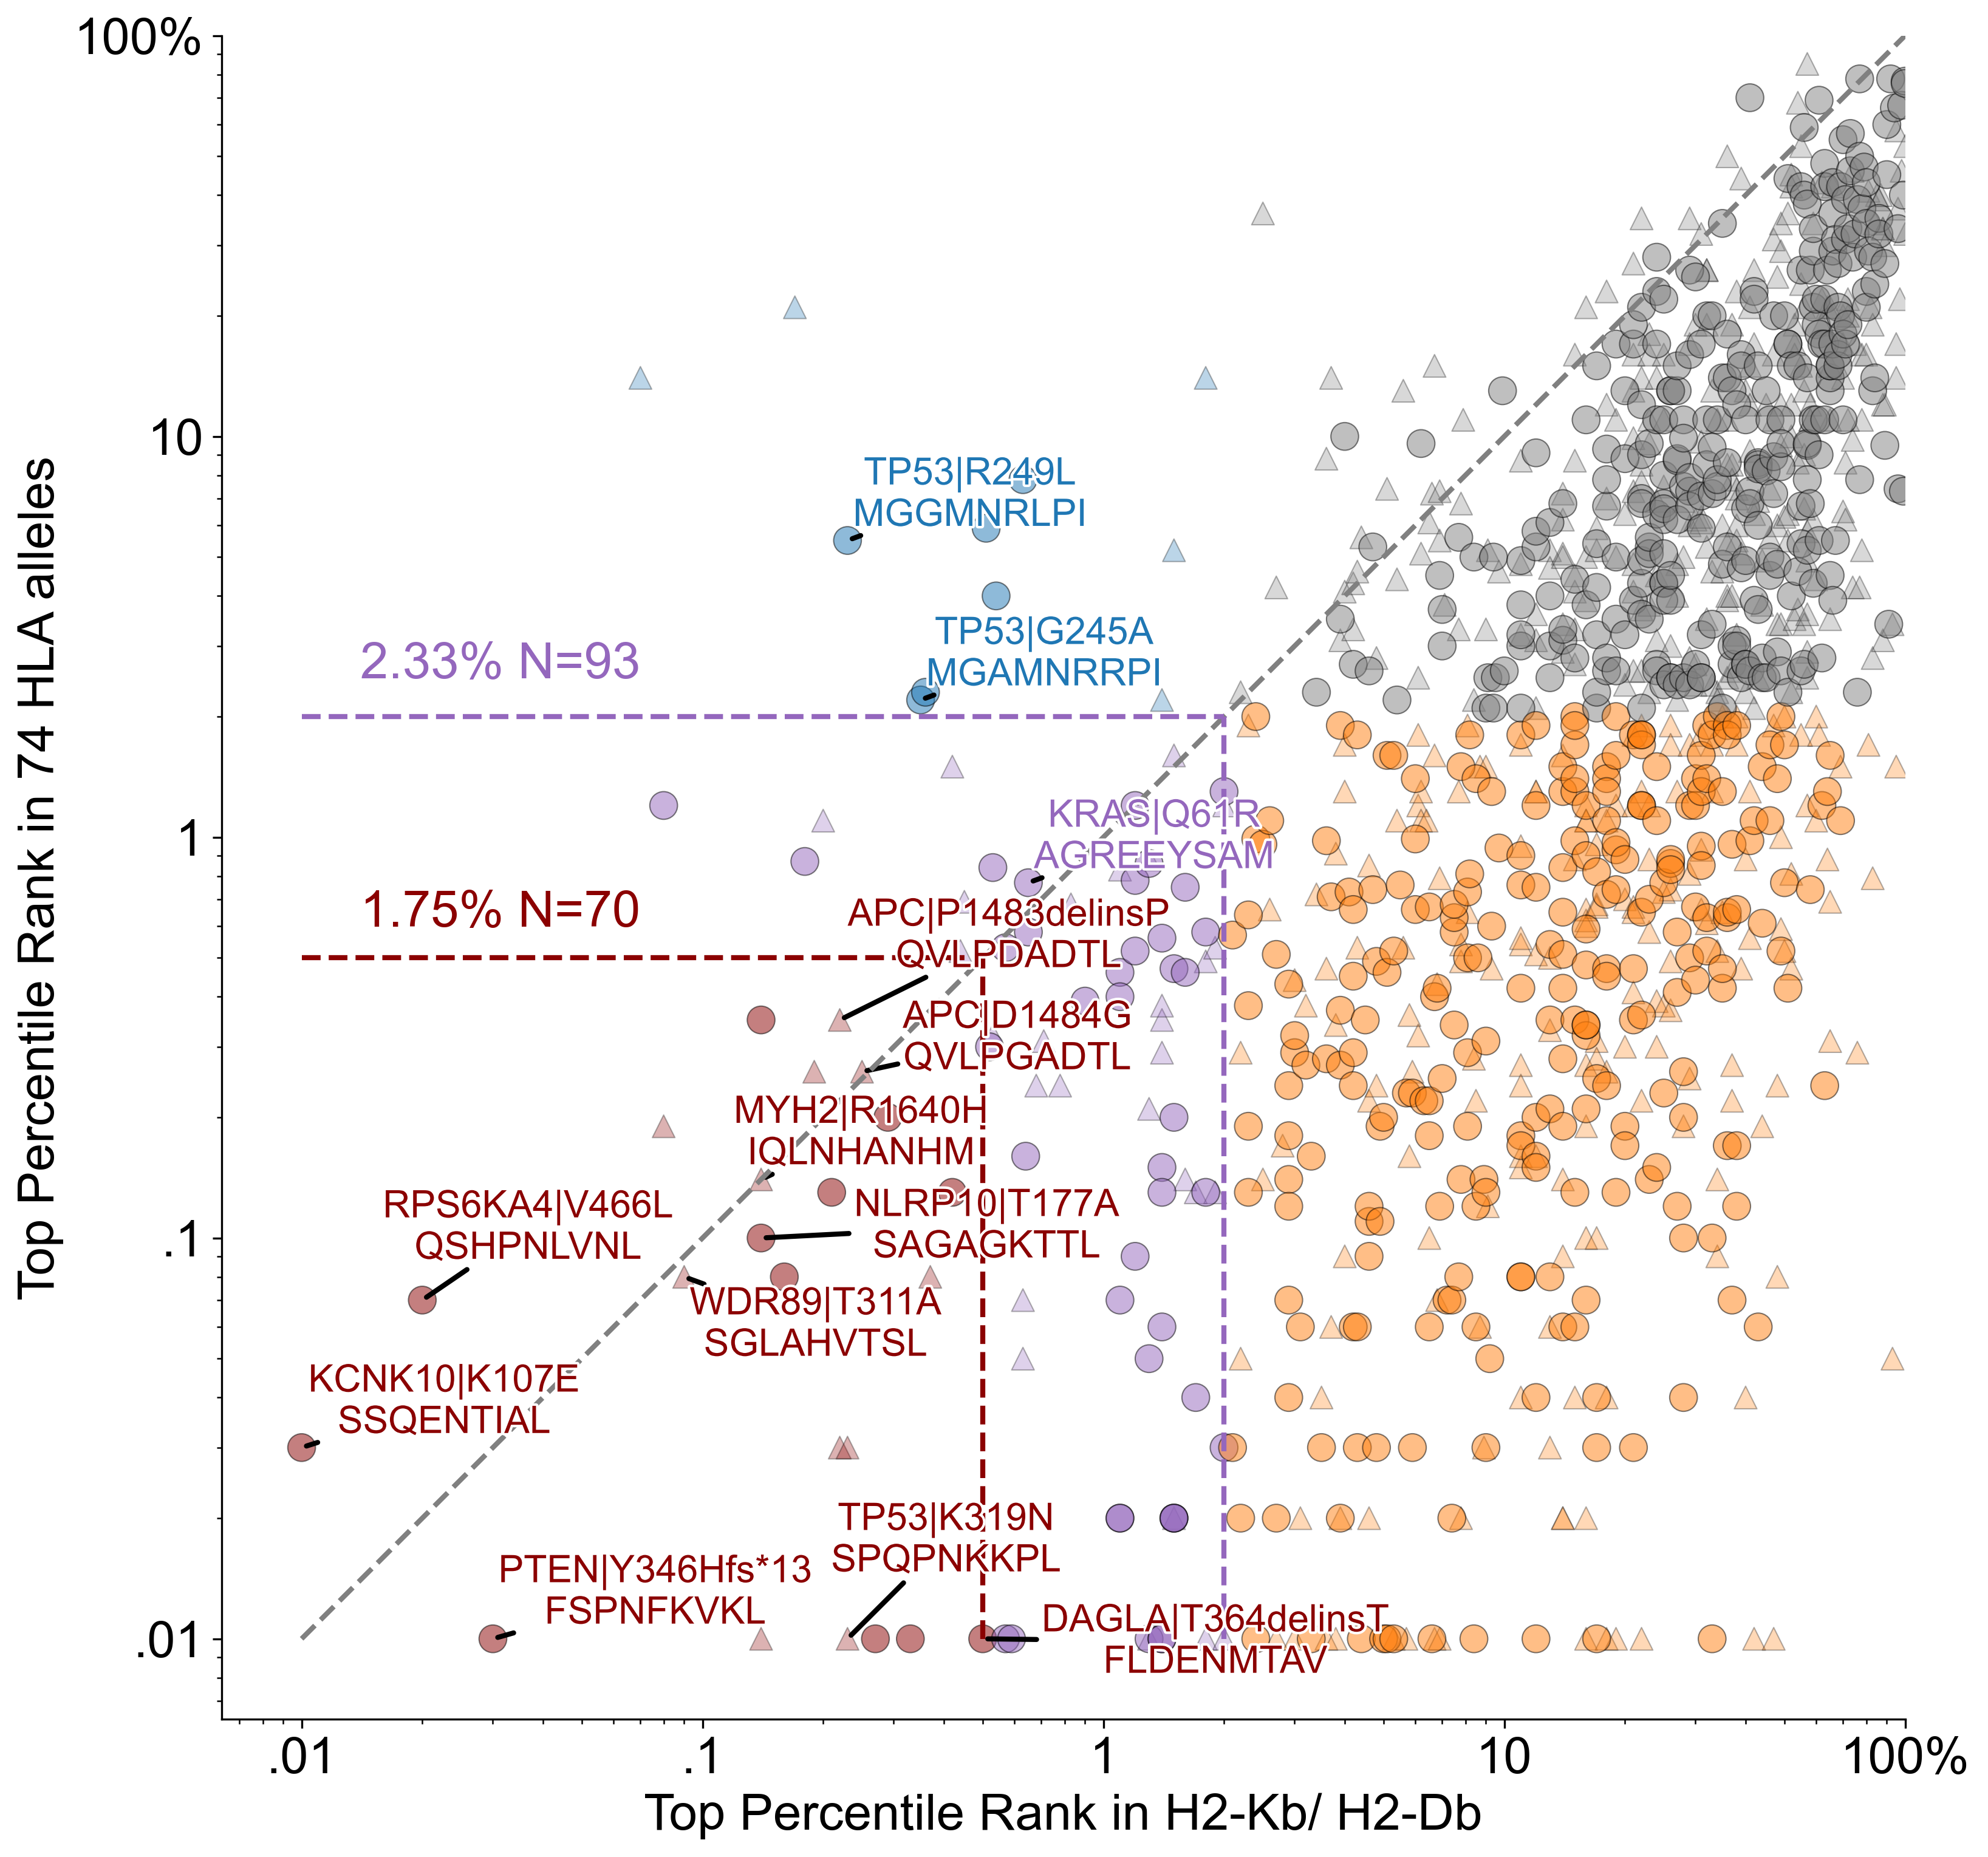

In [ ]:
l_plot = l_final
bbb1 = l_plot[[abs(x-y)<=0.05 for x,y in zip(l_plot['percentile_rank_kbdb'],l_plot['percentile_rank_h'])]].iloc[:6,:]
bbb2 = l_plot[(l_plot['percentile_rank_h'] <= .01) & (l_plot['percentile_rank_m'] >= 85)].iloc[:4,:]
bbb3 = l_plot[l_plot['gene_name_h'].isin(['DAGLA','KRAS'])].iloc[:6,:]
bbb4 = l_plot[l_plot['gene_name_h'].isin(['TP53','EGFR','APC'])].iloc[:6,:]
bb2 = pd.concat([bbb1,bbb2,bbb3,bbb4]).drop_duplicates(subset=['gene_name_h','HGVSp_h'])

x = list(bb2['percentile_rank_kbdb'])
y = list(bb2['percentile_rank_h'])
t = [f'{x}|{y}\n{p}' for x,y,p in zip(bb2['gene_name_h'], bb2['HGVSp_h'], bb2['human_9mers'])]
c = list(bb2['color_kb'])


fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

plot_1 = l_plot[[x==y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]
plot_2 = l_plot[[x!=y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]

ax.scatter(data=plot_2.sort_values('percentile_rank_kbdb').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_kbdb', y='percentile_rank_h', c = 'color_kb',alpha=.3, s=80, edgecolor='black', linewidths=.5, marker='^')
ax.scatter(data=plot_1.sort_values('percentile_rank_kbdb').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_kbdb', y='percentile_rank_h', c = 'color_kb',alpha=.5, s=120, edgecolor='black', linewidths=.5)

plt.xscale('log')
plt.yscale('log')
ax.plot([.01, 100], [.01, 100], linewidth=2, linestyle='--', color='grey')
ax.plot([.01, .5], [.5, .5], linewidth=2, linestyle='--', color='darkred')
ax.plot( [.5, .5], [.01, .5],linewidth=2, linestyle='--', color='darkred')
ax.plot([.01, 2], [2, 2], linewidth=2, linestyle='--', color='tab:purple')
ax.plot([2, 2], [.01, 2],linewidth=2, linestyle='--', color='tab:purple')

ax.set_aspect('equal')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_ylabel(f"Top Percentile Rank in 74 HLA alleles", fontsize=20)
ax.set_xlabel("Top Percentile Rank in H2-Kb/ H2-Db", fontsize=20)

ticks = [0.01, 0.1, 1, 10, 100]
labels = ['.01', '.1', '1', '10', '100%']

ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_locator(FixedLocator(ticks))

ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))

ax.tick_params(axis='both', labelsize=20)

# percentage label
l_1 = len(l_plot)
l_2 = len(l_plot[(l_plot['class_kb']=='both') | (l_plot['class_kb']=='strong')])
l_3 = len(l_plot[(l_plot['class_kb']=='both')])
per_1=l_2/l_1*100
per_2=l_3/l_1*100

tt = [f'{per_1:.2f}% N={l_2}', f'{per_2:.2f}% N={l_3}']
xx = [.014,.014]
yy = [2.5,.6]
cc = ['tab:purple', 'darkred']

# ax.set_title(f"{per_1:.2f}% predicted to be presented by both human and mouse, MHC class I", fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

texts = [ax.text(x[i], y[i], t[i], fontsize=15, color=c[i],
                 path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")],
              #  bbox=dict(facecolor='white', edgecolor=c[i], boxstyle='round,pad=0.3',alpha=.3)
                )
         for i in range(len(x))]

adjust_text(texts,only_move={'texts':'xy'}, ax=ax, 
            arrowprops=dict(arrowstyle="-", linewidth=2, alpha=1, color='black'))


texts_per = [ax.text(xx[i], yy[i], tt[i], fontsize=20, color=cc[i])
         for i in range(len(xx))]

plt.savefig('figures/ext_5c_main.pdf',bbox_inches='tight')
plt.show()

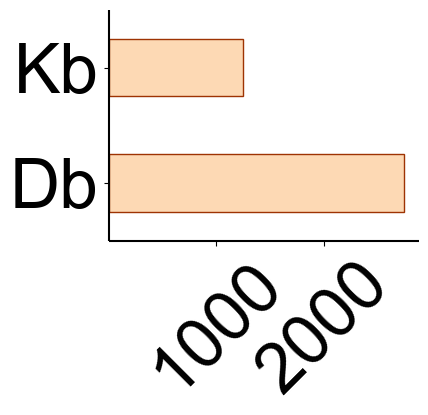

In [17]:
fig, ax = plt.subplots(figsize=(4,3))
allele_counts = l_final['KbDb_allele'].value_counts()[:5]
allele_counts = allele_counts
allele_counts.plot(kind='barh', color = plt.cm.Oranges(0.2) , edgecolor = plt.cm.Oranges(0.9))
plt.title('H2 Allele Frequency') 
plt.xlabel('Allele') 
plt.ylabel('Frequency') 
plt.xticks(rotation=45) 
ax.set_axisbelow(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_lw(1.5)
ax.spines["bottom"].set_capstyle("butt")
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_ticks([1000,2000])
ax.xaxis.set_ticklabels([1000,2000], size=50, fontweight=100)
plt.yticks(fontsize = 50)
plt.title('')
# plt.savefig('figures/ext_5c_xcount.pdf',bbox_inches='tight')
plt.show()

In [18]:
sum(allele_counts)

3991

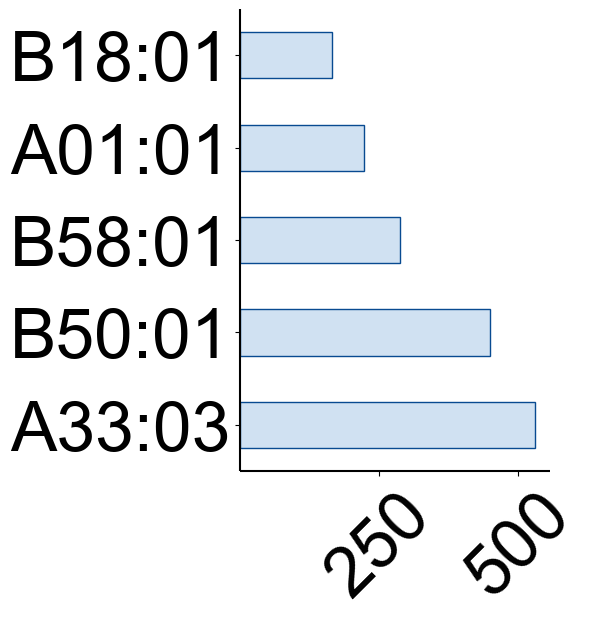

In [ ]:
fig, ax = plt.subplots(figsize=(4,6))
allele_counts = l_final['HLA_alleles'].value_counts()[:5]
allele_counts = allele_counts
allele_counts.plot(kind='barh', color = plt.cm.Blues(0.2) , edgecolor = plt.cm.Blues(0.9))
plt.title('H2 Allele Frequency') 
plt.xlabel('Allele') 
plt.ylabel('Frequency')  
plt.xticks(rotation=45)  
ax.set_axisbelow(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_lw(1.5)
ax.spines["bottom"].set_capstyle("butt")
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_ticks([250,500])
ax.xaxis.set_ticklabels([250,500], size=50, fontweight=100)
plt.yticks(fontsize = 50)
plt.title('')
plt.savefig('figures/ext_5c_ycount.pdf',bbox_inches='tight')
plt.show()

In [21]:
len(plot_1)

607

In [22]:
len(plot_2)

3384